In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drugs = ['CAZ', 'CIP', 'MEM', 'TOB']

In [ ]:
for drug in drugs:
    file = drug + '.tsv'
    df = pd.read_csv(file , sep = '\t')
    sig = df[df['lrt-pvalue'] < 3.33E-07]
    sig.to_csv(f'{drug}_sig.tsv', sep = '\t', index = False)
    

### wGWAS VS cisGWAS

In [13]:
import os
import pandas as pd

# Dictionary to store drug data as lists
drug_variants = {}

for drug in drugs:
    directory = f'{drug}/sig/'
    
    variants = []  # List to store variant names
    
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        if filename.startswith("PA"):  # Check for files starting with "PA"
            filepath = os.path.join(directory, filename)
            
            try:
                # Read the file into a DataFrame
                df = pd.read_csv(filepath, sep='\t', usecols=[0], names=['variant'])
            except Exception as e:
                print(f"Error reading {filename}: {e}")
                continue  # Skip this file
            
            # Collect unique variants
            variants.extend(df['variant'].tolist())

    # Remove duplicates
    drug_variants[drug] = list(set(variants))

# Convert dictionary to a DataFrame where each drug is a column
final_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in drug_variants.items()]))

# # Save the final table
# output_filepath = 'variant_matrix.tsv'
# final_df.to_csv(output_filepath, sep='\t', index=False)
# print(f"Saved variant matrix as {output_filepath}")
final_df

,CAZ,CIP,MEM,TOB
0,NC_008463.1_2713171_GGTCTGG_TTGCTGT,NC_008463.1_2015001_C_T,NC_008463.1_1922546_GGAG_CGAA,NC_008463.1_2020586_GAGCA_CAGCG
1,NC_008463.1_2680233_T_C,NC_008463.1_2683347_TGCCGACC_GGCTCACG,NC_008463.1_2680902_G_C,NC_008463.1_634572_G_A
2,NC_008463.1_2679695_G_A,variant,NC_008463.1_1928663_G_A,NC_008463.1_5542123_T_G
3,NC_008463.1_2679807_T_C,NC_008463.1_2686488_TGCG_CGCA,NC_008463.1_2710089_C_A,NC_008463.1_3786070_G_A
4,NC_008463.1_2704380_G_A,NC_008463.1_2685348_CGCC_GGCG,NC_008463.1_2707684_C_T,NC_008463.1_3242703_C_T
...,...,...,...,...
412,NaN,NaN,NaN,NC_008463.1_6448674_T_A
413,NaN,NaN,NaN,NC_008463.1_1063221_G_T
414,NaN,NaN,NaN,NC_008463.1_2006411_T_C
415,NaN,NaN,NaN,NC_008463.1_2021161_CTTGG_C


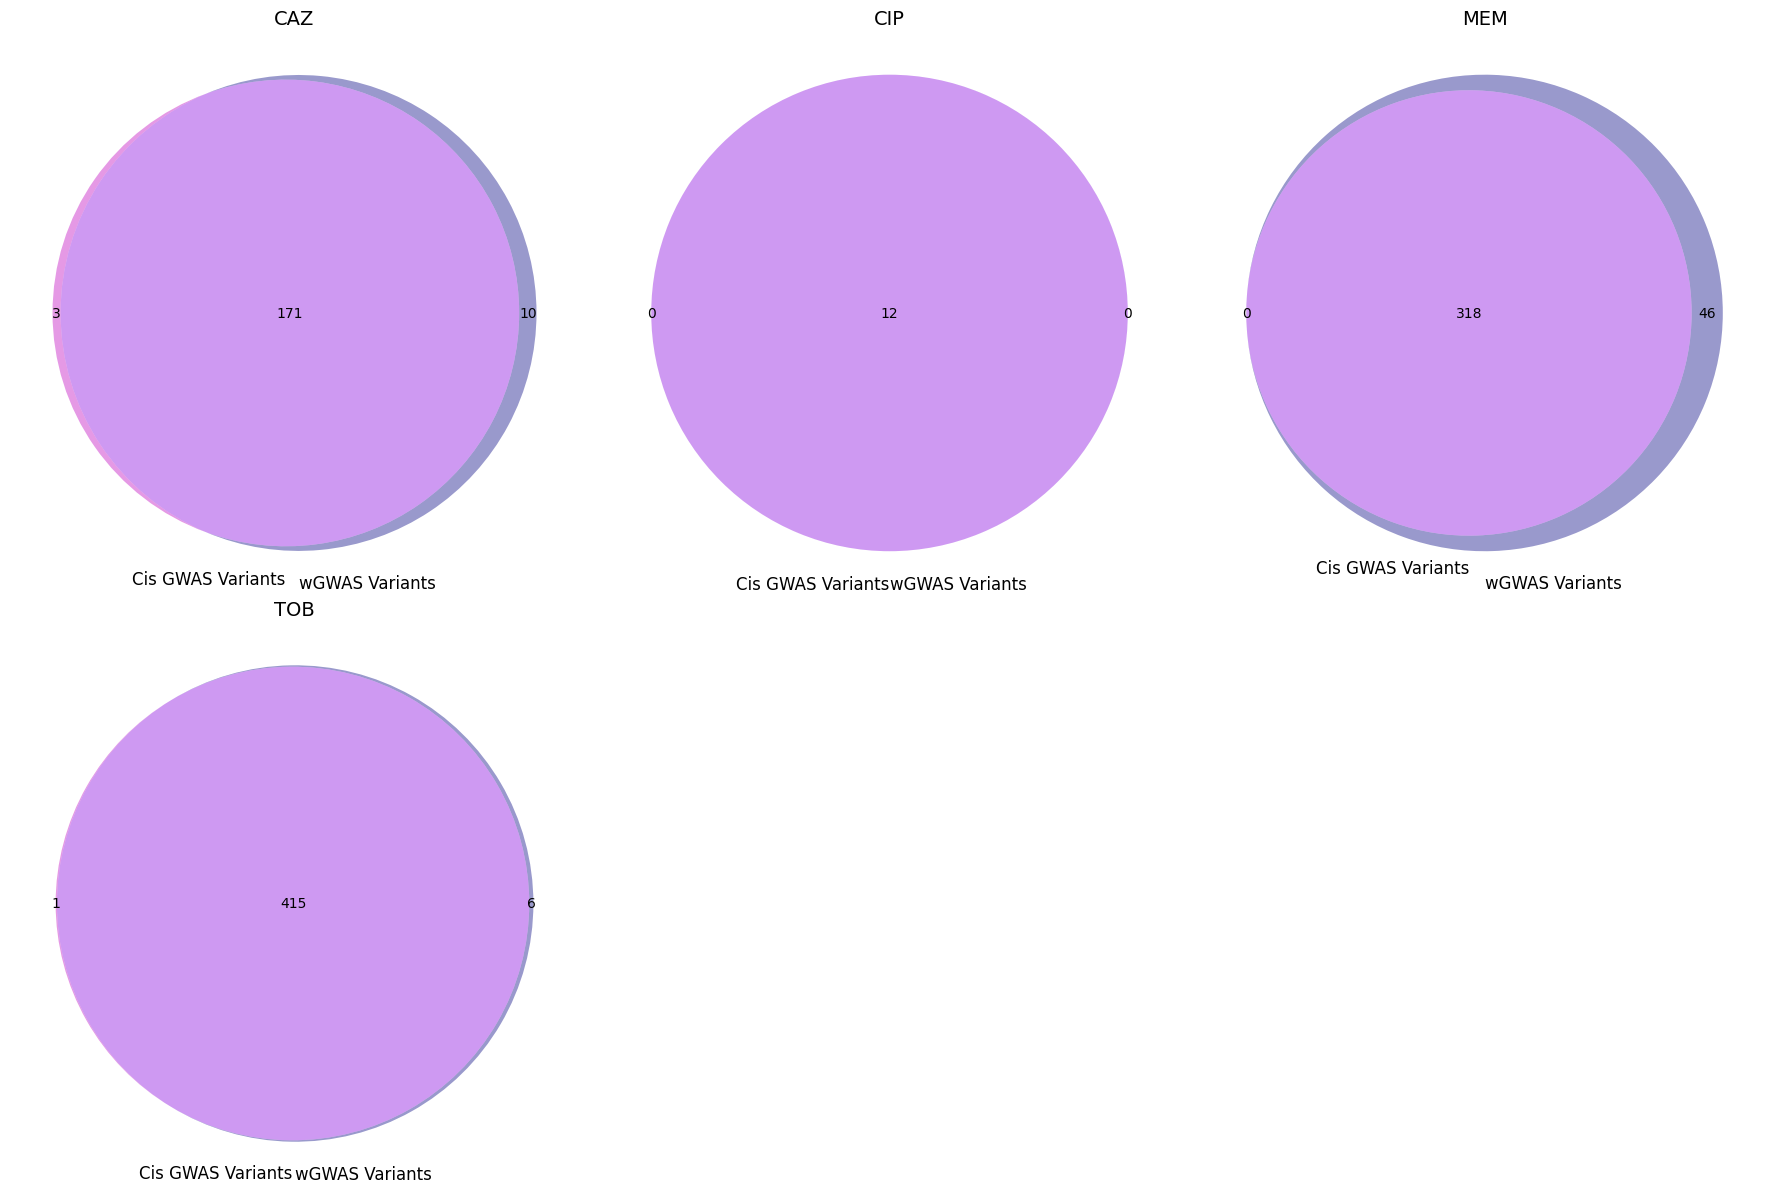

,Drug,Cis GWAS Variants,wGWAS Variants,Shared Variants,Percentage Shared (Cis in wGWAS),Percentage Shared (wGWAS in Cis),Shared Variant List
0,CAZ,174,181,171,98.275862,94.475138,"NC_008463.1_2685171_CACG_GACT, NC_008463.1_270..."
1,CIP,12,12,12,100.000000,100.000000,"NC_008463.1_2679650_G_C, NC_008463.1_2683347_T..."
2,MEM,318,364,318,100.000000,87.362637,"NC_008463.1_1940525_CGG_TGA, NC_008463.1_19364..."
3,TOB,416,421,415,99.759615,98.574822,"NC_008463.1_297100_C_T, NC_008463.1_296773_T_C..."



Summary Statistics:


,Total Drugs Analyzed,Mean Shared Variants,Median Shared Variants,Standard Deviation Shared Variants,Mean Percentage Shared (Cis in wGWAS),Mean Percentage Shared (wGWAS in Cis)
0,4,229.0,244.5,176.039768,99.508869,95.103149


In [3]:
from matplotlib_venn import venn2

# Define drugs list (Assuming it's predefined somewhere in your code)
drugs = ["CAZ", "CIP", "MEM", "TOB"]  # Replace with actual drug names if needed

valid_drugs = []
variant_data = []  # List to store variant information for the table

for drug in drugs:
    sig_directory = os.path.join(drug, "sig")

    if not os.path.exists(sig_directory):
        continue  # Skip if directory does not exist

    dfs = []
    for filename in os.listdir(sig_directory):
        if filename.endswith('.tsv'):
            filepath = os.path.join(sig_directory, filename)
            if os.path.isfile(filepath):
                df = pd.read_csv(filepath, sep='\t')
                dfs.append(df)

    if dfs:
        concatenated_df = pd.concat(dfs, ignore_index=True)
        if 'variant' in concatenated_df.columns:
            valid_drugs.append(drug)

# Check if there are valid drugs to plot
num_valid_drugs = len(valid_drugs)
if num_valid_drugs > 0:
    cols = 3
    rows = -(-num_valid_drugs // cols)  # Ceiling division to determine rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6))
    axes = axes.flatten()

    plot_index = 0
    for drug in valid_drugs:
        sig_directory = os.path.join(drug, "sig")
        dfs = []
        for filename in os.listdir(sig_directory):
            if filename.endswith('.tsv'):
                filepath = os.path.join(sig_directory, filename)
                if os.path.isfile(filepath):
                    df = pd.read_csv(filepath, sep='\t')
                    dfs.append(df)

        concatenated_df = pd.concat(dfs, ignore_index=True)
        cis_variants = set(concatenated_df['variant'])

        wGWAS_file = f'{drug}_sig.tsv'
        if not os.path.exists(wGWAS_file):
            continue

        wGWAS = pd.read_csv(wGWAS_file, sep='\t')
        if 'variant' not in wGWAS.columns:
            continue
        wGWAS_set = set(wGWAS['variant'])

        common_items = cis_variants.intersection(wGWAS_set)

        # Compute per-drug percentage shared variants
        percentage_cis_in_wgwas = (len(common_items) / len(cis_variants) * 100) if len(cis_variants) > 0 else 0
        percentage_wgwas_in_cis = (len(common_items) / len(wGWAS_set) * 100) if len(wGWAS_set) > 0 else 0

        # Store variant data for table
        variant_data.append({
            "Drug": drug,
            "Cis GWAS Variants": len(cis_variants),
            "wGWAS Variants": len(wGWAS_set),
            "Shared Variants": len(common_items),
            "Percentage Shared (Cis in wGWAS)": percentage_cis_in_wgwas,
            "Percentage Shared (wGWAS in Cis)": percentage_wgwas_in_cis,
            "Shared Variant List": ", ".join(common_items)  # Convert set to comma-separated string
        })

        ax = axes[plot_index]
        venn2(subsets=(len(cis_variants - common_items), 
                       len(wGWAS_set - common_items),    
                       len(common_items)),               
              set_labels=('Cis GWAS Variants', 'wGWAS Variants'), 
              set_colors=('m', 'navy'), ax=ax)
        ax.set_title(f'{drug}', fontsize=14)

        plot_index += 1

    # Remove empty subplots
    for i in range(plot_index, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Create and display a DataFrame for shared variant information
df_variants = pd.DataFrame(variant_data)
if not df_variants.empty:
    from IPython.display import display
    display(df_variants)

    # Compute summary statistics
    summary_stats = {
        "Total Drugs Analyzed": num_valid_drugs,
        "Mean Shared Variants": df_variants["Shared Variants"].mean(),
        "Median Shared Variants": df_variants["Shared Variants"].median(),
        "Standard Deviation Shared Variants": df_variants["Shared Variants"].std(),
        "Mean Percentage Shared (Cis in wGWAS)": df_variants["Percentage Shared (Cis in wGWAS)"].mean(),
        "Mean Percentage Shared (wGWAS in Cis)": df_variants["Percentage Shared (wGWAS in Cis)"].mean()
    }

    df_summary = pd.DataFrame([summary_stats])
    print("\nSummary Statistics:")
    display(df_summary)
else:
    print("No valid variant data available.")


###

### Map SNPs back to gene

In [2]:
drug_files = ["CAZ_sig.tsv", "CIP_sig.tsv", "MEM_sig.tsv", "TOB_sig.tsv"]
gene_file_path = "PA14_genes.txt"

for drug in drug_files:
    snp_file_path = drug
    
    # Load SNP file
    snp_data = pd.read_csv(snp_file_path, sep="\t")

    # Extract the relevant SNP column (assuming the first column contains SNP info)
    snp_column = snp_data.columns[0]  # Identify the SNP column name
    snp_data = snp_data[[snp_column]]  # Keep only this column
    snp_data.rename(columns={snp_column: "SNP"}, inplace=True)

    # Extract SNP positions from the SNP strings (format: NC_008463.1_17265_C_T)
    snp_data["Position"] = snp_data["SNP"].apply(lambda x: int(x.split("_")[2]) if isinstance(x, str) and "_" in x else None)

    # Drop any rows where Position could not be extracted
    snp_data = snp_data.dropna().reset_index(drop=True)
    snp_data["Position"] = snp_data["Position"].astype(int)

    # Load gene positions file
    gene_data = pd.read_csv(gene_file_path, sep="\t")

    # Convert start and end positions to integers
    gene_data["start"] = gene_data["start"].astype(int)
    gene_data["end"] = gene_data["end"].astype(int)

    # Define cis-regulatory regions based on strand direction
    positive_strand = gene_data[gene_data['strand'] == '+'].copy()
    positive_strand['region_start'] = positive_strand['start'] - 200  # Upstream for positive strand
    positive_strand['region_end'] = positive_strand['start'] + 30    # Downstream for positive strand

    negative_strand = gene_data[gene_data['strand'] == '-'].copy()
    negative_strand['region_start'] = negative_strand['end'] - 30     # Upstream for negative strand
    negative_strand['region_end'] = negative_strand['end'] + 200     # Downstream for negative strand

    # Function to assign SNPs to the closest gene
    def find_closest_gene(position):
        # Check if SNP is inside a gene (strand-independent)
        match = gene_data[(gene_data["start"] <= position) & (gene_data["end"] >= position)]
        if not match.empty:
            return match.iloc[0]["locus_tag"]  # SNP inside a gene

        # Check positive strand regions
        near_positive = positive_strand[(positive_strand['region_start'] <= position) & (positive_strand['region_end'] >= position)]
        if not near_positive.empty:
            return near_positive.iloc[0]["locus_tag"]  # Assign to closest positive strand gene

        # Check negative strand regions
        near_negative = negative_strand[(negative_strand['region_start'] <= position) & (negative_strand['region_end'] >= position)]
        if not near_negative.empty:
            return near_negative.iloc[0]["locus_tag"]  # Assign to closest negative strand gene

        # If no direct match, find the closest gene
        closest_gene = gene_data.iloc[(gene_data[['start', 'end']].sub(position).abs().min(axis=1)).idxmin()]
        return closest_gene["locus_tag"]

    # Map SNP positions to the closest gene
    snp_data["Gene"] = snp_data["Position"].apply(find_closest_gene)
    filename = drug.split('_')[0]
    snp_data.to_csv(f'{filename}_mapped.tsv', sep = '\t')

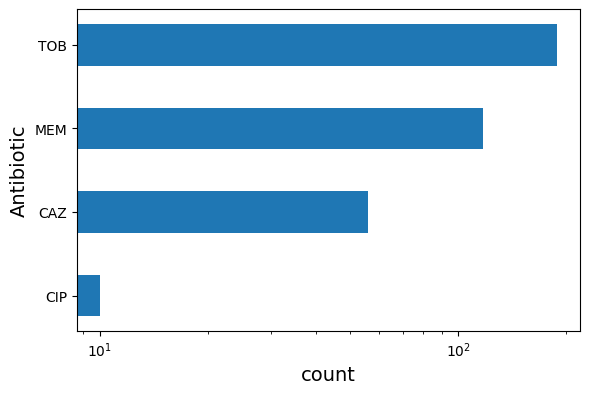

93.0


In [11]:
counts = {}
mapped_files = ["CAZ_mapped.tsv", "CIP_mapped.tsv", "MEM_mapped.tsv", "TOB_mapped.tsv"]

for drug in mapped_files :
    file = drug
    name = drug.split("_")[0]
    try:
        d = pd.read_csv(file, sep='\t', index_col=0)
        counts[name] = len(d['Gene'].unique())
    except FileNotFoundError:
        print(f"Warning: {file} not found. Skipping.")
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Convert dictionary to DataFrame
sig_count = pd.DataFrame.from_dict(counts, orient='index', columns=['count'])

# Sort in descending order for better visualization
sig_count = sig_count.sort_values(by='count', ascending=True)


average_snp_count = sum(counts.values()) / len(counts)

# Display the result
average_snp_count


# Plotting
plt.figure(figsize=(6, 4))
plt.barh(sig_count.index, sig_count['count'], height=0.5)
plt.xlabel('count', fontsize=14)
plt.ylabel('Antibiotic', fontsize=14)
plt.subplots_adjust(left=0.3)  # Prevents label cutoff
plt.tight_layout()
plt.xscale("log")
#plt.savefig('sig_genes.svg', dpi=300)
plt.show()
print(average_snp_count)

In [10]:
print(counts)

{'CAZ': 56, 'CIP': 10, 'MEM': 117, 'TOB': 189}
